# Imports

In [1]:
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
generator_path = '../0DataGeneration/gen/' 
trials = generator_path+'trials.csv'
trials = pd.read_csv(trials, index_col=0)
trials

,6000,1001,14000,8016,name,filename,ptrac_filename
index,,,,,,,
0,-0.000100,-0.000100,-0.466600,-0.533200,concentration_C_0001_Si_4666,../compute/output/mctal/concentration_C_0001_S...,../compute/output/ptrac/concentration_C_0001_S...
1,-0.008667,-0.000300,-0.461600,-0.529433,concentration_C_008666666666666666_Si_4616,../compute/output/mctal/concentration_C_008666...,../compute/output/ptrac/concentration_C_008666...
2,-0.017233,-0.000500,-0.456600,-0.525667,concentration_C_017233333333333333_Si_4566,../compute/output/mctal/concentration_C_017233...,../compute/output/ptrac/concentration_C_017233...
3,-0.025800,-0.000700,-0.451600,-0.521900,concentration_C_0258_Si_4516,../compute/output/mctal/concentration_C_0258_S...,../compute/output/ptrac/concentration_C_0258_S...
4,-0.034933,-0.000967,-0.446267,-0.517833,concentration_C_03493333333333333_Si_446266666...,../compute/output/mctal/concentration_C_034933...,../compute/output/ptrac/concentration_C_034933...
5,-0.044067,-0.001233,-0.440933,-0.513767,concentration_C_044066666666666664_Si_44093333...,../compute/output/mctal/concentration_C_044066...,../compute/output/ptrac/concentration_C_044066...
6,-0.053200,-0.001500,-0.435600,-0.509700,concentration_C_0532_Si_4356,../compute/output/mctal/concentration_C_0532_S...,../compute/output/ptrac/concentration_C_0532_S...
7,-0.073800,-0.002067,-0.423600,-0.500533,concentration_C_0738_Si_4236,../compute/output/mctal/concentration_C_0738_S...,../compute/output/ptrac/concentration_C_0738_S...
8,-0.094400,-0.002633,-0.411600,-0.491367,concentration_C_0944_Si_4116,../compute/output/mctal/concentration_C_0944_S...,../compute/output/ptrac/concentration_C_0944_S...


In [3]:
true_c_concentrations = trials['6000'].values
true_c_concentrations = np.array([float(x) for x in true_c_concentrations])
true_c_concentrations = -true_c_concentrations
true_c_concentrations = true_c_concentrations.tolist()

true_si_concentrations = trials['14000'].values
true_si_concentrations = np.array([float(x) for x in true_si_concentrations])
true_si_concentrations = -true_si_concentrations
true_si_concentrations = true_si_concentrations.tolist()

concentrations = [[si, c] for c, si in zip(true_c_concentrations, true_si_concentrations)]


In [34]:
spectrums = generator_path+'spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y'][:, 0, :]

In [35]:
headers = [str(x[0])[2:][:2]+'.'+str(x[0])[2:][2:4]+"%C" for x in concentrations]

In [ ]:
[x for x in spectrums]

(16, 935)

In [40]:
df = pd.DataFrame(spectrums.T, columns=headers)

In [41]:
df

,46.66%C,46.16%C,45.66%C,45.16%C,44.62%C,44.09%C,43.56%C,42.36%C,41.16%C,39.96%C,38.56%C,37.16%C,35.76%C,34.14%C,32.53%C,30.92%C
0,22.11,22.80,22.37,22.28,21.96,23.47,22.37,22.70,22.60,21.28,21.99,20.92,21.38,21.72,21.09,20.66
1,0.10,0.09,0.23,0.11,0.14,0.06,0.06,0.11,0.06,0.10,0.13,0.15,0.17,0.13,0.13,0.20
2,396.91,396.96,395.74,396.84,398.60,396.51,396.72,393.74,392.74,394.44,394.39,393.57,394.40,389.85,392.98,389.11
3,535.72,533.60,537.05,535.47,535.13,536.77,536.51,539.62,534.74,536.58,537.20,535.95,535.88,535.56,536.85,534.49
4,579.94,581.90,582.71,581.05,583.51,583.21,585.09,584.46,582.44,588.30,585.21,584.31,582.21,582.91,586.40,586.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2.64,2.15,2.35,2.29,2.53,2.26,2.19,2.14,2.00,2.29,1.87,1.99,2.01,2.06,1.79,1.73
931,2.44,2.39,2.51,2.57,2.64,2.62,2.41,2.22,2.32,2.18,2.49,2.33,2.08,2.10,2.17,1.73
932,2.44,2.36,2.28,2.34,2.28,2.52,2.44,2.42,2.17,1.96,2.02,2.07,1.97,1.71,1.85,1.80
933,2.37,2.42,2.37,2.27,2.43,2.51,2.29,2.15,2.11,1.91,2.01,2.15,2.12,1.70,1.80,1.77


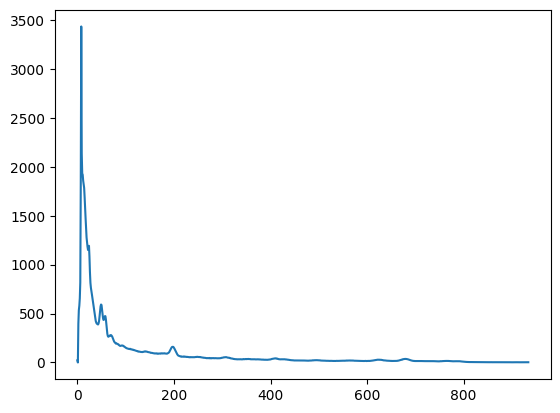

In [43]:
plt.plot(df['46.66%C'])